## Circuito elétrico utilizado

![alt text](img/10.png "Title")


## Modelagem Matemática

![alt text](img/4.png "Title")

Usando a lei de Kirchhoff das tensões e aplicando Laplace, obtemos a seguinte equação:

![alt text](img/1.png "Title")

Portanto, a função de transferência H(s) é dada por:

![alt text](img/2.png "Title")

## Especificação dos Valores de R, L e C para um sistema de segunda ordem subamortecido levando em consideração: 

![alt text](img/3.png "Title")
Agora apenas com KP no numerador:
![alt text](img/5.png "Title")
Relacionando à Função de Transferência do circuito RLC:
Utilizando os valores de L = 1 mH e C = 0.1 uF devido falta de outras opções no mercado
![alt text](img/6.png "Title")
Para um sistema subamortecido de segunda ordem, ζ deve estar em um valor entre 0 e 1 definindo ζ = 0,7: 
R*C = 2*Wn R = 2*0.7100000*0.1*10-6R = 140 Ohms
Será utilizado o resistor de valor comercial mais próximo de 140 Ohms, é o resistor de 120 Ohms, então o valor de ζ será alterado:
120*100000*0.1*10-62 = ζ = 0.6 
A função de transferência H(s) já com o valor dos componentes será:
![alt text](img/7.png "Title")


## Simulação

Script utilizado no MATLAB:

% Valores de R, L, C

R = 120;

L = 0.001;

C = 0.0000001;

num = [1];

den = [L*C,R*C,1];
 
t = 0:0.000001:0.001;
 
[y,x,t] = step(num,den,t); %Resposta ao degrau
 
plot(t,y) % plota a FT
 
grid

xlabel('Tempo (s)');

ylabel('Resposta do Sistema');

title('Resposta do Sistema Subamortecido de Segunda Ordem');

![alt text](img/8.png "Title")


## Importações

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

## Limpando Dataset

In [5]:
arquivo_xlsx = 'dataset/C4.xlsx'

def limpar_tempo(tempo):
    return float(''.join(filter(str.isdigit, str(tempo))))

warnings.filterwarnings("ignore", category=UserWarning)

try:
    df = pd.read_excel(arquivo_xlsx, header=None, skiprows=2)

    df.columns = df.iloc[0]

    df = df.iloc[1:]

    df = df.dropna(axis=1, how='all')

    df_1_5v = df.iloc[:, :3].copy() 
    df_3_6v = df.iloc[:, 6:9].copy()  
    df_4_8v = df.iloc[:, 9:12].copy() 
    
    df_1_5v.columns = ['Tempo (ms)', 'Arduino', 'Volts']
    df_3_6v.columns = ['Tempo (ms)', 'Arduino', 'Volts']
    df_4_8v.columns = ['Tempo (ms)', 'Arduino', 'Volts']

    df_1_5v['Tempo (ms)'] = df_1_5v['Tempo (ms)'].astype(str).apply(limpar_tempo) * 100
    df_3_6v['Tempo (ms)'] = df_3_6v['Tempo (ms)'].astype(str).apply(limpar_tempo) * 100
    df_4_8v['Tempo (ms)'] = df_4_8v['Tempo (ms)'].astype(str).apply(limpar_tempo) * 100

    print("1.5V:")
    print(df_1_5v)
    print("\n3.6V:")
    print(df_3_6v)
    print("\n4.8V:")
    print(df_4_8v)

except FileNotFoundError:
    print(f"Arquivo '{arquivo_xlsx}' não encontrado.")
except Exception as e:
    print(f"Ocorreu um erro: {str(e)}")

1.5V:
    Tempo (ms) Arduino     Volts
1          0.0       0         0
2        100.0     317  1.549365
3        200.0     316  1.544477
4        300.0     315  1.539589
5        400.0     315  1.539589
6        500.0     314  1.534702
7        600.0     313  1.529814
8        700.0     313  1.529814
9        800.0     312  1.524927
10       900.0     312  1.524927
11      1000.0     312  1.524927
12      1100.0     312  1.524927
13      1200.0     311  1.520039
14      1300.0     312  1.524927
15      1400.0     311  1.520039
16      1500.0     311  1.520039
17      1600.0     312  1.524927
18      1700.0     311  1.520039
19      1800.0     311  1.520039
20      1900.0     311  1.520039
21      2000.0     311  1.520039
22      2100.0     311  1.520039
23      2200.0     311  1.520039
24      2300.0     311  1.520039
25      2400.0     311  1.520039

3.6V:
    Tempo (ms) Arduino     Volts
1          0.0       0         0
2        100.0     755  3.690127
3        200.0     755  3.6901

## Gerando Gráficos das Medidas Coletadas

Foi gerado um grafico ignorando a primeira medida para poder visualizar melhor a oscilação dos dados coletados.

In [128]:
def plotar_grafico_dataframe(dataframe, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label):
    try:
        if nome_coluna_tempo not in dataframe.columns or nome_coluna_tensao not in dataframe.columns:
            raise ValueError("As colunas especificadas não foram encontradas no DataFrame.")

        plt.figure(figsize=(10, 6))
        plt.plot(dataframe[nome_coluna_tempo], dataframe[nome_coluna_tensao], label=label)
        plt.xlabel('Tempo (ms)')
        plt.ylabel('Tensão (V)')
        plt.title(f'Gráfico de Tensão por Tempo')
        plt.grid(True)

        plt.legend()

        plt.savefig(nome_imagem, bbox_inches='tight')

        plt.show()

    except Exception as e:
        print(f'Ocorreu um erro ao plotar o gráfico: {str(e)}')

In [60]:
def plotar_grafico_oscilacao(dataframe, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label):
    try:
        if nome_coluna_tempo not in dataframe.columns or nome_coluna_tensao not in dataframe.columns:
            raise ValueError("As colunas especificadas não foram encontradas no DataFrame.")

        plt.figure(figsize=(10, 6))
        plt.plot(dataframe[nome_coluna_tempo].iloc[1:], dataframe[nome_coluna_tensao].iloc[1:], label=label)
        plt.xlabel('Tempo (ms)')
        plt.ylabel('Tensão (V)')
        plt.title(f'Gráfico de Tensão por Tempo (Ignorando a Primeira Medida)')
        plt.grid(True)

        plt.legend()

        plt.savefig(nome_imagem, bbox_inches='tight')

        plt.show()

    except Exception as e:
        print(f'Ocorreu um erro ao plotar o gráfico: {str(e)}')


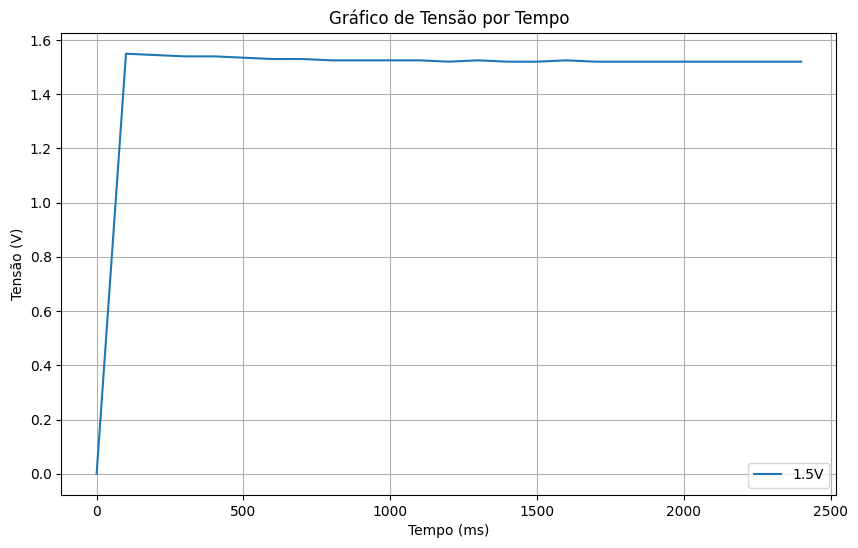

In [59]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_tempo.png'

plotar_grafico_dataframe(df_1_5v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="1.5V")

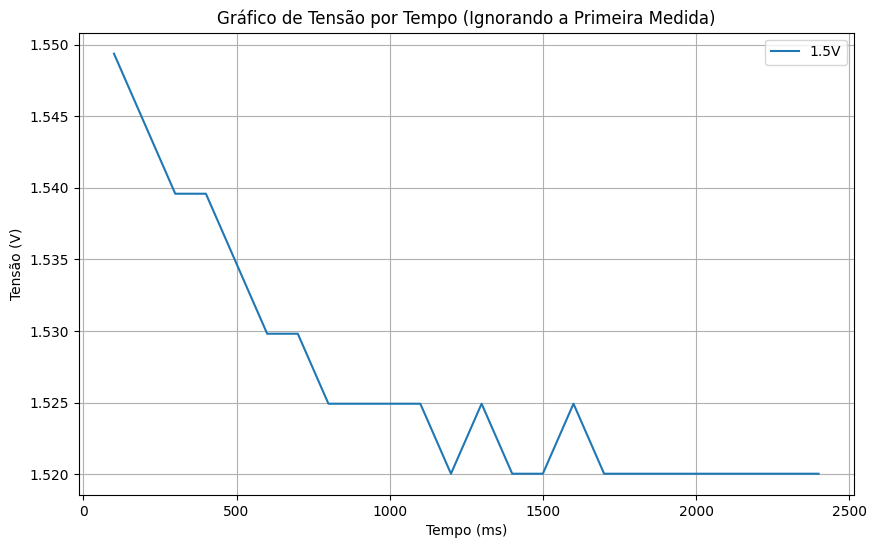

In [61]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_oscilacao.png'

plotar_grafico_oscilacao(df_1_5v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="1.5V")

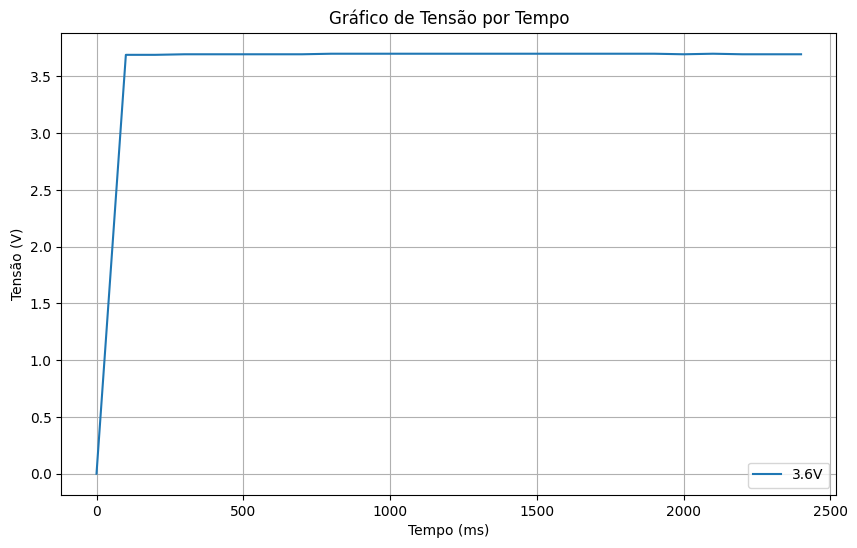

In [62]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_tempo.png'

plotar_grafico_dataframe(df_3_6v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="3.6V")

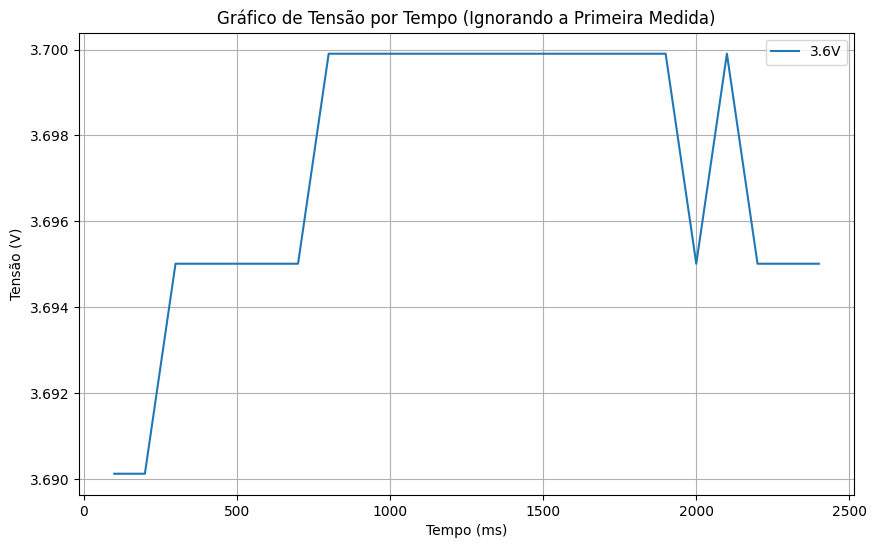

In [63]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_tempo.png'

plotar_grafico_oscilacao(df_3_6v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="3.6V")

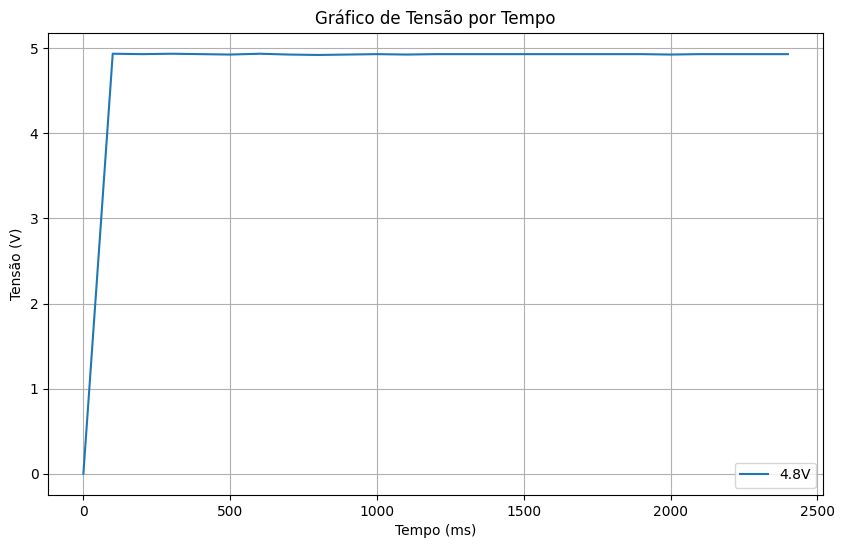

In [64]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_tempo.png'

plotar_grafico_dataframe(df_4_8v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="4.8V")

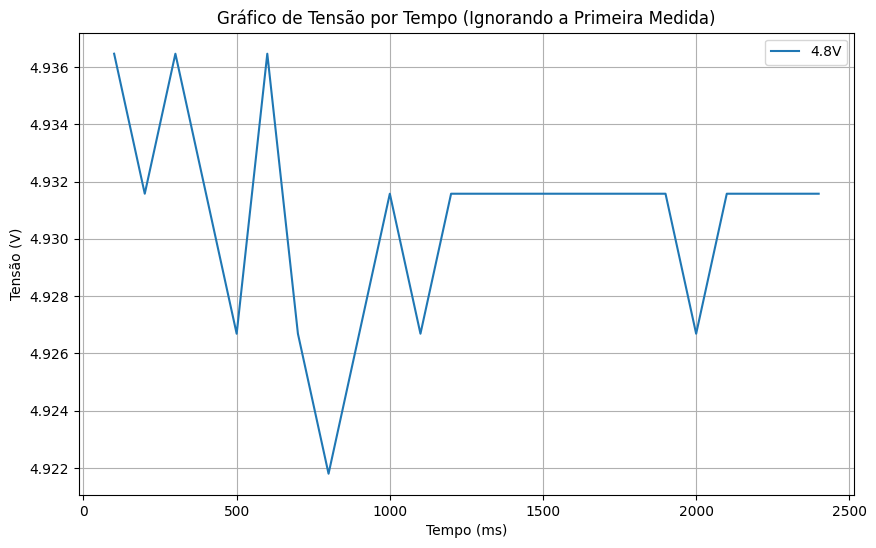

In [65]:
nome_coluna_tempo = 'Tempo (ms)'
nome_coluna_tensao = 'Volts'
nome_imagem = 'grafico_tensao_tempo.png'

plotar_grafico_oscilacao(df_4_8v, nome_coluna_tempo, nome_coluna_tensao, nome_imagem, label="4.8V")

## Gerando o Modelo de Regressão Linear

In [99]:
def gerar_entrada_constante(valor, tamanho):
    entrada = [valor] * tamanho
    return entrada

In [147]:
def estimar_modelo_e_plotar(dataframe, nome_dataframe, entrada):
    try:
        # Dados de saída
        coluna_tensao = dataframe['Volts'].iloc[1:].tolist()

        # Construção da matriz phi
        phi = np.zeros((len(entrada) - 1, 2))
        phi[:, 0] = entrada[:-1]
        phi[:, 1] = coluna_tensao[:-1]

        # Saída desejada
        yn = np.array(coluna_tensao[1:])

        # Cálculo dos parâmetros teta usando mínimos quadrados
        teta = np.linalg.inv(phi.T @ phi) @ phi.T @ yn

        # Cálculo do erro quadrático médio (RMSE)
        erro_quad_medio = np.sqrt(np.mean((yn - phi @ teta) ** 2))

        # Plot dos resultados
        plt.figure(figsize=(10, 6))
        plt.plot(yn, label=f'Saída medida ({nome_dataframe})')
        yc = phi @ teta
        plt.plot(yc, 'r', label=f'Saída estimada ({nome_dataframe})')
        plt.legend()
        plt.xlabel('Tempo (ms)')
        plt.ylabel('Tensão (V)')
        plt.title(f'Estimativa de Saída de Sistema ({nome_dataframe})')
        plt.grid(True)
        plt.show()

        print(f"Erro Quadrático Médio (RMSE) para {nome_dataframe}: {erro_quad_medio:.4f}")

    except Exception as e:
        print(f'Ocorreu um erro ao processar o DataFrame: {str(e)}')

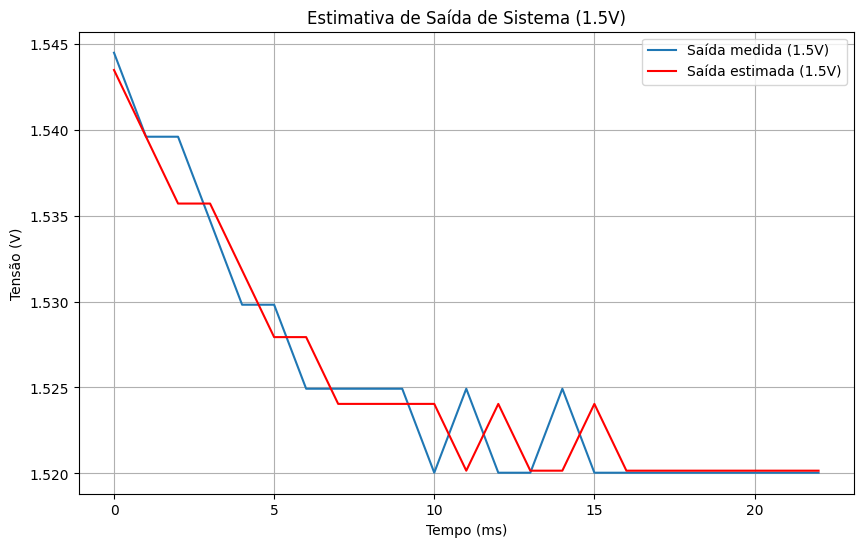

Erro Quadrático Médio (RMSE) para 1.5V: 0.0024


In [148]:
entrada = [1.5] * (len(df_1_5v)-1)
estimar_modelo_e_plotar(df_1_5v, '1.5V',entrada)

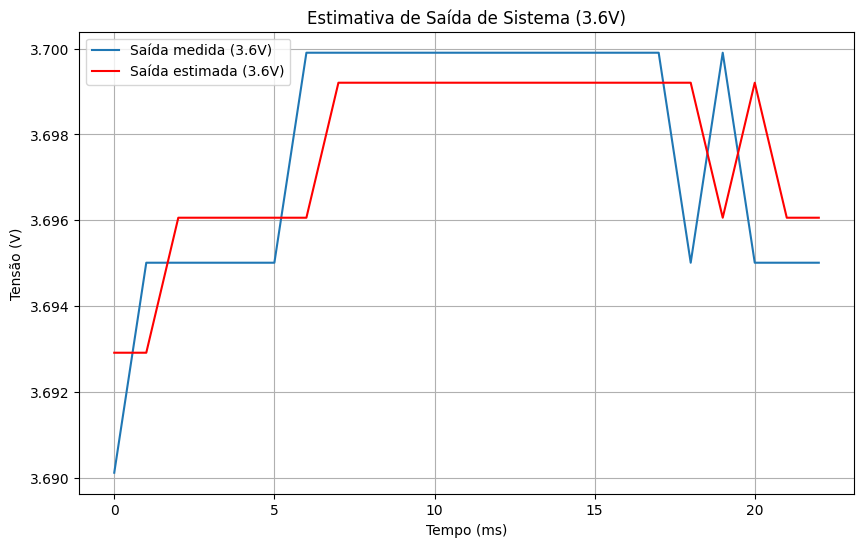

Erro Quadrático Médio (RMSE) para 3.6V: 0.0020


In [150]:
entrada = [3.6] * (len(df_3_6v)-1)
estimar_modelo_e_plotar(df_3_6v, '3.6V',entrada)

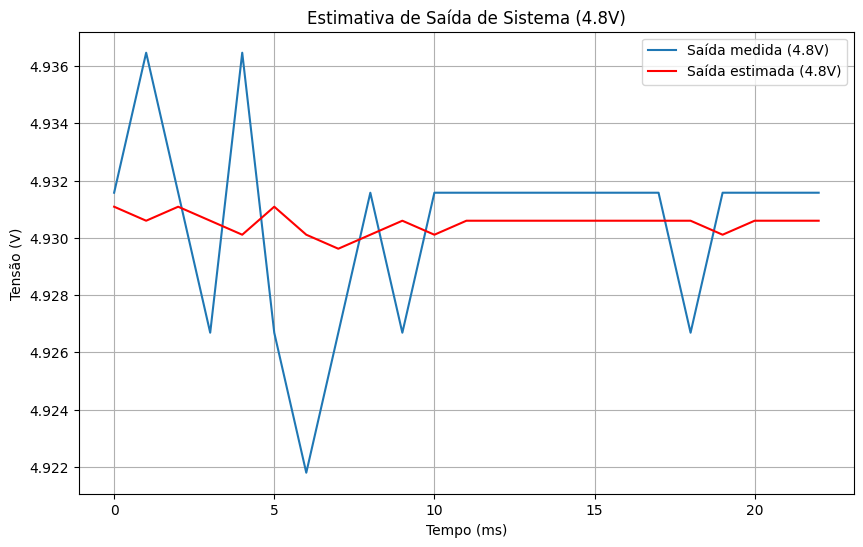

Erro Quadrático Médio (RMSE) para 4.8V: 0.0032


In [151]:
entrada = [4.8] * (len(df_4_8v)-1)
estimar_modelo_e_plotar(df_4_8v, '4.8V',entrada)

## Conclusão

1- Erro Quadrático Médio (RMSE) para 1.5V: 0.0024

2- Erro Quadrático Médio (RMSE) para 3.6V: 0.0020

3- Erro Quadrático Médio (RMSE) para 4.8V: 0.0032

Esses valores indicam que o modelo de estimativa de saída teve um desempenho excelente na previsão da saída, com erros bastante baixos. O RMSE é uma métrica comum para avaliar o quão bem um modelo se ajusta aos dados reais, e valores próximos de zero indicam que o modelo é capaz de replicar com precisão as variações na saída real.

Portanto, com base nos resultados do RMSE, podemos concluir que o modelo de estimativa de saída demonstrou um desempenho muito bom, sendo capaz de prever com precisão a saída com base na entrada constante. Essa precisão é fundamental em muitos contextos, onde a estimativa precisa é necessária para a operação adequada de sistemas e dispositivos.

Link para o notebook: https://github.com/ArtBreguez/sistemas-inteligentes-relatorio-1